# News Data Multi-classification

Reuters News dataset
- news article which can categorized into 46 subjects

1. load the dataset

In [ ]:
import keras
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000)
# train : test = 8 :2

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key)for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

2. Preparing the data

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

3. Building network

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


4. Validating 

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 66ms/step - loss: 2.6407 - accuracy: 0.5101 - val_loss: 1.6939 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.3962 - accuracy: 0.7012 - val_loss: 1.2848 - val_accuracy: 0.7040
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0423 - accuracy: 0.7747 - val_loss: 1.1146 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8198 - accuracy: 0.8232 - val_loss: 1.0241 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6518 - accuracy: 0.8657 - val_loss: 0.9394 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5207 - accuracy: 0.8904 - val_loss: 0.9368 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4238 - accuracy: 0.9121 - val_loss: 0.8758 - val_accuracy: 0.8130
Epoch 8/20
16

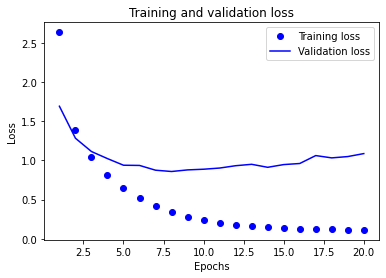

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

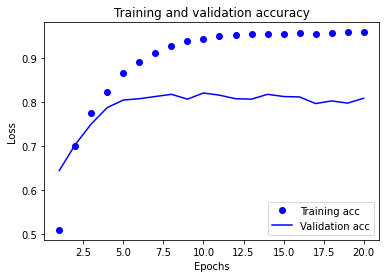

In [ ]:
plt.clf()  

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 61ms/step - loss: 2.6848 - accuracy: 0.5198 - val_loss: 1.8124 - val_accuracy: 0.6310
Epoch 2/8
16/16 [==============================] - 1s 49ms/step - loss: 1.4781 - accuracy: 0.6929 - val_loss: 1.3345 - val_accuracy: 0.7030
Epoch 3/8
16/16 [==============================] - 1s 48ms/step - loss: 1.0811 - accuracy: 0.7684 - val_loss: 1.1439 - val_accuracy: 0.7570
Epoch 4/8
16/16 [==============================] - 1s 49ms/step - loss: 0.8438 - accuracy: 0.8269 - val_loss: 1.0442 - val_accuracy: 0.7850
Epoch 5/8
16/16 [==============================] - 1s 48ms/step - loss: 0.6699 - accuracy: 0.8637 - val_loss: 0.9608 - val_accuracy: 0.8060
Epoch 6/8
16/16 [==============================] - 1s 48ms/step - loss: 0.5297 - accuracy: 0.8955 - val_loss: 0.9537 - val_accuracy: 0.7920
Epoch 7/8
16/16 [==============================] - 1s 48ms/step - loss: 0.4257 - accuracy: 0.9123 - val_loss: 0.9043 - val_accuracy: 0.8130
Epoch 8/8
71/71 [===

In [ ]:
results

[0.9780339598655701, 0.7836152911186218]

In [ ]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1803205699020481

- Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

0.9999998

In [ ]:
np.argmax(predictions[0])

3

- A different way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

- On the importance of having sufficiently large intermediate layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 2.6747 - accuracy: 0.3254 - val_loss: 1.9819 - val_accuracy: 0.5710
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 1.6816 - accuracy: 0.5996 - val_loss: 1.5583 - val_accuracy: 0.6250
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 1.3228 - accuracy: 0.6835 - val_loss: 1.4060 - val_accuracy: 0.6580
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 1.1352 - accuracy: 0.7073 - val_loss: 1.3392 - val_accuracy: 0.6860
Epoch 5/20
63/63 [==============================] - 1s 23ms/step - loss: 1.0077 - accuracy: 0.7452 - val_loss: 1.3208 - val_accuracy: 0.6970
Epoch 6/20
63/63 [==============================] - 2s 29ms/step - loss: 0.9099 - accuracy: 0.7660 - val_loss: 1.3048 - val_accuracy: 0.7070
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 0.8320 - accuracy: 0.7791 - val_loss: 1.3265 - val_accuracy: 0.7120
Epoch 8/20
63

# Further experiments

1. Single hidden layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 1.8415 - accuracy: 0.6429 - val_loss: 1.2078 - val_accuracy: 0.7400
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 0.9291 - accuracy: 0.8053 - val_loss: 0.9659 - val_accuracy: 0.8040
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 0.6323 - accuracy: 0.8712 - val_loss: 0.8537 - val_accuracy: 0.8130
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 0.4530 - accuracy: 0.9064 - val_loss: 0.8064 - val_accuracy: 0.8300
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 0.3391 - accuracy: 0.9263 - val_loss: 0.8019 - val_accuracy: 0.8250
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 0.2628 - accuracy: 0.9391 - val_loss: 0.8094 - val_accuracy: 0.8270
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 0.2173 - accuracy: 0.9445 - val_loss: 0.8319 - val_accuracy: 0.8200
Epoch 8/20
63

2. Three hidden layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 3s 27ms/step - loss: 3.1979 - accuracy: 0.2347 - val_loss: 2.5276 - val_accuracy: 0.3840
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 2.1799 - accuracy: 0.3842 - val_loss: 1.9822 - val_accuracy: 0.3850
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 1.8010 - accuracy: 0.4535 - val_loss: 1.7621 - val_accuracy: 0.5490
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 1.5846 - accuracy: 0.5980 - val_loss: 1.6604 - val_accuracy: 0.5870
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 1.4522 - accuracy: 0.6111 - val_loss: 1.6062 - val_accuracy: 0.6010
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 1.3693 - accuracy: 0.6235 - val_loss: 1.6022 - val_accuracy: 0.6150
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 1.3119 - accuracy: 0.6438 - val_loss: 1.6565 - val_accuracy: 0.6030
Epoch 8/20
63

3. Using larger or smaller layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 16ms/step - loss: 3.0239 - accuracy: 0.3148 - val_loss: 2.3255 - val_accuracy: 0.5300
Epoch 2/20
63/63 [==============================] - 1s 12ms/step - loss: 1.9194 - accuracy: 0.6060 - val_loss: 1.7000 - val_accuracy: 0.6280
Epoch 3/20
63/63 [==============================] - 1s 13ms/step - loss: 1.5297 - accuracy: 0.6446 - val_loss: 1.5399 - val_accuracy: 0.6350
Epoch 4/20
63/63 [==============================] - 1s 13ms/step - loss: 1.3675 - accuracy: 0.6606 - val_loss: 1.4634 - val_accuracy: 0.6490
Epoch 5/20
63/63 [==============================] - 1s 13ms/step - loss: 1.2443 - accuracy: 0.6756 - val_loss: 1.4151 - val_accuracy: 0.6510
Epoch 6/20
63/63 [==============================] - 1s 13ms/step - loss: 1.1386 - accuracy: 0.6896 - val_loss: 1.3563 - val_accuracy: 0.6620
Epoch 7/20
63/63 [==============================] - 1s 13ms/step - loss: 1.0402 - accuracy: 0.7319 - val_loss: 1.3337 - val_accuracy: 0.6910
Epoch 8/20
63

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 31ms/step - loss: 2.5784 - accuracy: 0.3860 - val_loss: 1.8830 - val_accuracy: 0.5720
Epoch 2/20
63/63 [==============================] - 2s 28ms/step - loss: 1.5670 - accuracy: 0.5978 - val_loss: 1.4905 - val_accuracy: 0.5970
Epoch 3/20
63/63 [==============================] - 2s 29ms/step - loss: 1.2623 - accuracy: 0.6566 - val_loss: 1.3656 - val_accuracy: 0.6500
Epoch 4/20
63/63 [==============================] - 2s 28ms/step - loss: 1.0886 - accuracy: 0.7190 - val_loss: 1.3173 - val_accuracy: 0.6770
Epoch 5/20
63/63 [==============================] - 2s 28ms/step - loss: 0.9542 - accuracy: 0.7543 - val_loss: 1.2959 - val_accuracy: 0.6900
Epoch 6/20
63/63 [==============================] - 2s 28ms/step - loss: 0.8514 - accuracy: 0.7734 - val_loss: 1.3334 - val_accuracy: 0.6870
Epoch 7/20
63/63 [==============================] - 2s 28ms/step - loss: 0.7751 - accuracy: 0.7900 - val_loss: 1.3749 - val_accuracy: 0.6970
Epoch 8/20
63